---
title: "CFRM 505 Homework 2"
author: "Eunki Chung <br> eunkich@uw.edu"
date: today
date-format: long
output: pdf_document
---

# Problem 1

Consider the random variable $X$ whose cdf is given by

$$F_{X}(x) = \int_{0}^{\infty}2x^{y}e^{-2y}\,\textrm{d}y \:\textrm{ for all }\: 0 < x < 1$$

Use Monte Carlo simulation to estimate the mean and variance of this distribution.  Use the following methods to generate samples of $X$ (using at least $10,000$ samples for each part).

## Part 1

Find a closed form expression for $F_{X}$ (i.e., do the integral) and then use the inverse transform method.



$$
\begin{aligned}
\int_{0}^{\infty}2x^{y}e^{-2y}\,\textrm{d}y &= \int_{0}^{\infty}2e^{\ln x^{y}}e^{-2y}\,\textrm{d}y \\
&= \int_{0}^{\infty}2e^{y \ln x - 2y}\,\textrm{d}y \\
&= \int_{0}^{\infty}2e^{y (\ln x - 2)}\,\textrm{d}y \\
&= \lim_{n\rightarrow \infty} \left. \frac{2}{\ln x - 2}e^{y (\ln x - 2)}
\right|^n_0 \\
&= \lim_{n\rightarrow \infty} \frac{2}{\ln x - 2}e^{n (\ln x - 2)} -
\frac{2}{\ln x - 2} \\
&= \lim_{n\rightarrow \infty} \frac{2}{\ln x - 2}e^{\ln x^n - 2n} - \frac{2}{\ln
x - 2} \\
&= \lim_{n\rightarrow \infty} \frac{2}{\ln x - 2}x^n e^{-2n} - \frac{2}{\ln x -
2} \\ \\
\text{Notice that } x^n, e^{-2n} &\rightarrow 0 \text{ as } n
\rightarrow \infty \quad \text{for } 0 < x < 1\\ \\
&= - \frac{2}{\ln x - 2}
\end{aligned}
$$

$$
F_X(x) =  - \frac{2}{\ln x - 2}
$$

$$
\begin{aligned}
    f_X(x) &= \frac{dF_X}{dx} \\ 
    &= \frac{2}{x(\ln x - 2)^2}
\end{aligned}
$$

$$
\begin{aligned}
u &= \frac{-2}{\ln x - 2} \\
(\ln x - 2) u &= -2 \\
\ln x - 2 &= \frac{-2}{u} \\
\ln x &= 2 - \frac{2}{u} \\
x &= \exp\left(2 - \frac{2}{u}\right) \\
\end{aligned}
$$

$$
\therefore \quad X = \exp\left(2 - \frac{2}{U}\right) \qquad U \sim \text{Unif}(0, 1)\\
$$

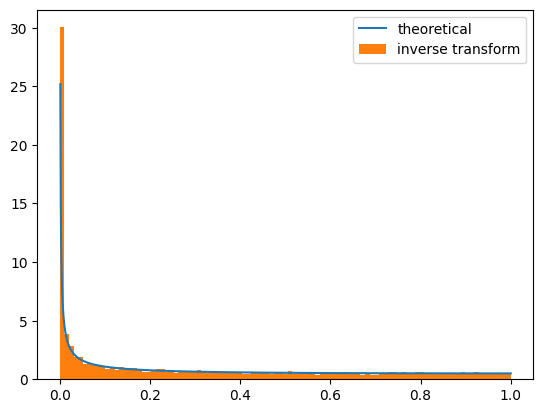

In [17]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(12)
u = np.random.random(10000)
x = np.exp(2 - (2 / u))
bins = np.linspace(0, 1, 100)
supp = np.linspace(0, 1, 1000)[1:]
f = 2 / ((np.log(supp) - 2) ** 2 * supp)
plt.plot(supp, f, label="theoretical")
plt.hist(x, bins=bins, density=True, label="inverse transform")
plt.legend()
plt.show()


## Part 2
Use the composition method.  (Hint: Use $f_{Y}(y) = 2e^{-2y}$ and $F_{X|Y}(x; y) = x^y$.)

$$
Y \sim \text{Exp}(2)
$$
$$
Y = \frac{- \ln U}{2} \quad U \sim \text{Unif}(0, 1)
$$

$$
F_{X|Y}(x | y) = x^y
$$
$$
\begin{aligned}
    x^y &= v \\ 
    x &= v^{\frac{1}{y}} 
\end{aligned}
$$

$$
X|Y = V^{\frac{1}{Y}} \qquad V \sim \text{Unif}(0, 1), \quad Y\sim \text{Exp}(2)
$$

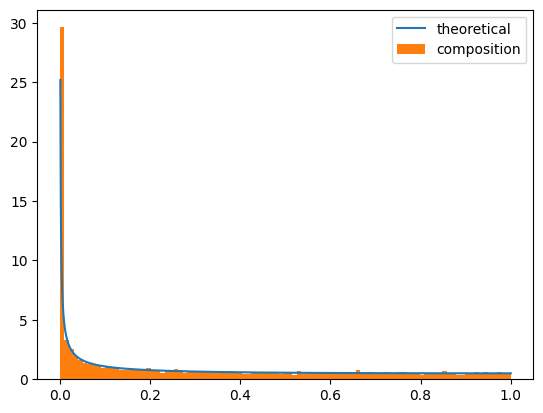

In [18]:
y = -np.log(u) / 2
v = np.random.random(10000)
x = v ** (1/y)
plt.plot(supp, f, label="theoretical")
plt.hist(x, bins=bins, density=True, label="composition")
plt.legend()
plt.show()


# Problem 2

Use Monte Carlo simulation to estimate the mean and variance of $X\sim\textrm{Poisson}(10)$.  Plot a histogram from your data.  Use the inverse transform method to generate $X$ and use at least $10,000$ samples.

$$E[X] = Var[X] = \lambda = 10 $$

In [19]:
lamda = 10
size = int(1e5)


def poisson(lamda):
    n = 0
    p = np.exp(-lamda)
    F = p
    U = np.random.random()
    while U > F:
        p = lamda * p / (n+1)
        F += p
        n += 1
    return n


X = np.empty(size)
for i in range(size):
    X[i] = poisson(10)

print(f"Mean: {np.mean(X)}\tVar: {np.var(X)}")


Mean: 9.99559	Var: 9.986870551900001


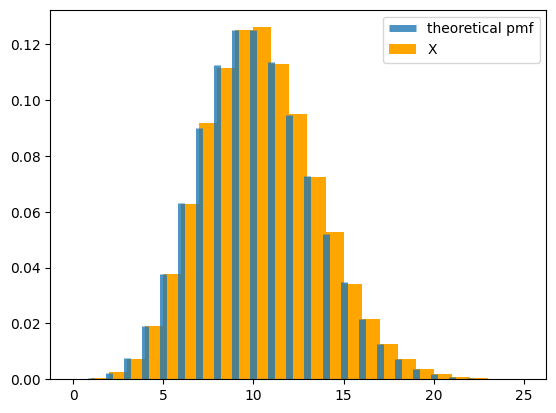

In [20]:
import scipy.stats as stats
x = np.linspace(0, 25, 26)
plt.vlines(x, 0, stats.poisson(10).pmf(x),
           label='theoretical pmf', alpha=.8, lw=5)
plt.hist(X, bins=25, density=True, color="orange", label="X")
plt.legend()
plt.show()


# Problem 3

Consider the following "game":

1) Set $r = 1$ and $n = 1$

2) Generate a random vector $(X, Y)$ uniformly distributed on the square $[-1, 1]\times [-1, 1]$.

3) If $X^2 + Y^2 > r^2$, then stop.

4) If $X^2 + Y^2 \leq r^2$, then set $r$ equal to $\sqrt{r^2 - X^2 - Y^2}$ and set $n$ equal to $n + 1$, then start over at step (2).

Your score at the end of this game is $N = n$ (the number of random vectors you calculated).  Use Monte Carlo simulation with at least 10,000 samples to simulate this game and estimate the expected score $\mathbb{E}[N]$.

(This game is taken from [the lesson by Grant Sanderson in 3b1b](https://www.3blue1brown.com/lessons/hyperdarts).  The link has a lovely proof that the expected value is actually $e^{\pi/4}$.)

In [21]:
size = 10000


def game(size):
    out = np.empty(size)
    for i in range(size):
        r = n = 1
        while True:
            x, y = np.random.uniform(-1, 1, (2,))
            if x ** 2 + y ** 2 > r ** 2:
                break
            else:
                r = np.sqrt(r ** 2 - x ** 2 - y ** 2)
                n += 1
        out[i] = n

    return out


n = game(10000)
print(f"Estimate: {n.mean():.4f}  Theoretical: {np.e ** (np.pi / 4):.4f}")


Estimate: 2.2005  Theoretical: 2.1933


# Problem 4

Use the inverse transform method to to estimate the mean and variance of the following random variables:

## Part a

$X = \textrm{min}\left\{X_1,\, X_2,\, X_3\right\}$ where $X_1$, $X_2$ and $X_3$ are i.i.d. exponentially distributed random variables with parameter $\lambda = 2$.

$$
X_i \overset{iid}{\sim} \text{Exp}(2)\quad \text{for }i=1, 2, 3
$$

$$
X = \min\{X_1, X_2, X_3\}
$$

$$
\begin{aligned}
    F_X(x) &= P[X \leq x] \\ 
    &= P[\min\{X_1, X_2, X_3\} \leq x] \\ 
    &= 1 - P[X_1 > x, X_2 > x, X_3 > x] \\ 
    &= 1 - P[X_1 > x] \cdot P[X_2 > x] \cdot P[X_3 > x] \\
    &= 1 - (1-P[X_i \leq x])^3 \\
    &= 1 - (1-F_{X_i}(x))^3 \\
    &= 1 - (1-(1-e^{-\lambda x}))^3 \\
    &= 1 - e^{-3 \lambda x} \\
\end{aligned}
$$

$$
\begin{aligned}
    u &= 1 - e^{-3 \lambda x} \\
    e^{-3 \lambda x} &= 1 - u \\
    -3 \lambda x &= \ln(1 - u) \\
    x &= -\frac{\ln(1 - u)}{3 \lambda } \\
    \\
\end{aligned}
$$

$$
X = -\frac{\ln(1-U)}{3\lambda} = -\frac{\ln(U)}{3\lambda} \qquad U \sim
\text{Unif}(0, 1)
$$

In [22]:
size = 100000
lamda = 2

u = np.random.random(size)
x = - np.log(u) / (3 * lamda)
print(f"Mean: {x.mean():.4f}, Var: {x.var():.4f}")


Mean: 0.1667, Var: 0.0283


## Part b

$Y$ with the pdf

$$f_{Y}(y) = \left\{ \begin{array}{cc} \frac{3}{8}y^{2}e^{-y^3/8} & y > 0 \\ 0 & \textrm{otherwise} \end{array} \right.$$

$$
\begin{aligned}
    \int_0^y f_Y(t) dt &= \int_0^y \frac{3}{8}t^{2}e^{-t^3/8} dy \\
    &= \left. -e^{-t^3/8}\right|^y_0 \\
    &= -e^{-y^3/8} - (-1) \\
    &= 1-e^{-y^3/8} \\
\end{aligned}
$$

$$
\begin{aligned}
    u &= 1 - e^{-y^3 / 8} \\
    e^{-y^3 / 8} &= 1-u \\
    -y^3 / 8 &= \ln(1-u) \\
    y^3 &= -8\ln(1-u) \\
    y &= (-8\ln(1-u))^{1/3} \\
\end{aligned}
$$

$$
\begin{aligned}
    Y = (-8\ln(1-U))^{1/3} = (-8\ln(U))^{1/3} \qquad U \sim \text{Unif(0, 1)}
\end{aligned}
$$

In [23]:
size = 1000000

u = np.random.random(size)
y = (-8 * np.log(u)) ** (1/3)

print(f"Mean: {y.mean():.4f}, Var: {y.var():.4f}")


Mean: 1.7868, Var: 0.4209


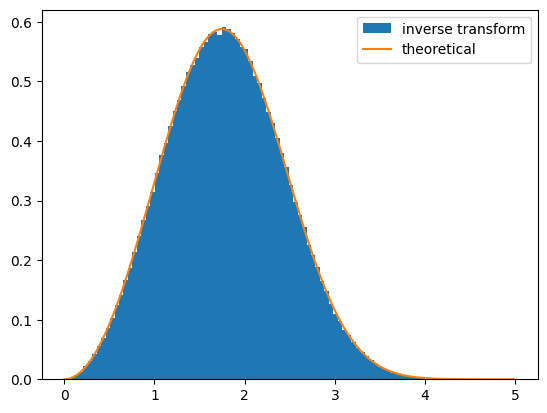

In [24]:
import seaborn as sns
supp = np.linspace(0, 5, 1000)
f = 3 / 8 * supp ** 2 * np.exp(-(supp ** 3) / 8)
plt.hist(y, bins=100, label='inverse transform', density=True)
plt.plot(supp, f, label='theoretical')
plt.legend()
plt.show()


# Problem 5

Use the acceptance-rejection method to generate a random variable $X$ with the pdf

$$f_{X}(x) = \left\{ \begin{array}{cc} \frac{3}{16}\left(3 + x - x^2\right) & 0 \leq x \leq 2 \\ 0 & \textrm{otherwise} \end{array} \right.$$

You can use a bounding rectangle (which amounts to using a uniform density $g(x)$), but you should choose the rectangle to be as small as possible.

Use your simulation code to generate at least $10,000$ samples.  Estimate the expected value of $X$ and compute the expected number of trials needed per accepted sample.

$$
\begin{aligned}
    f_X(x) &= \frac{3}{16}\left(3 + x - x^2\right) \\
    f'_X(x) &= \frac{3}{16}\left(1-2x^*\right) = 0 \\
    x^* = \frac{1}{2}
\end{aligned}
$$
That is, 
$$
\underset{x}{\arg\max} f_X = \frac{1}{2} \\
\max_x f_X = \frac{39}{64}
$$


Thus, we set the height of the bounding rectangle to 39/64

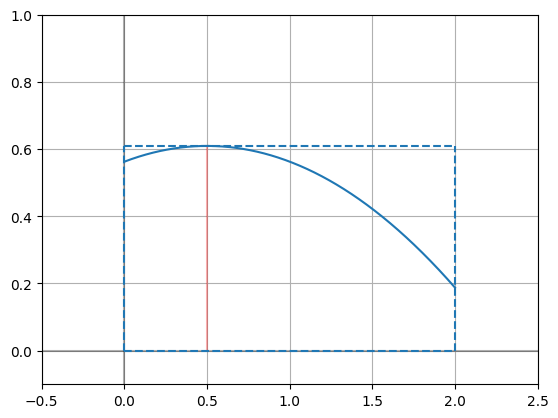

In [25]:
supp = np.linspace(0, 2, 1000)


def f(x):
    return 3/16 * (3 + x - x ** 2)


plt.plot(supp, f(supp))
fmax = 3/16 * (3 + 1/2 - 1/2 ** 2)
plt.vlines(1/2, alpha=.3, color='r', ymin=0, ymax=fmax)
plt.axhline(0, alpha=.3, color='black')
plt.axvline(0, alpha=.3, color='black')
plt.hlines([0, fmax], xmin=0, xmax=2, ls='--')
plt.vlines([0, 2], ymin=0, ymax=fmax, ls='--')
plt.xlim(-.5, 2.5)
plt.ylim(-.1, 1)
plt.grid()


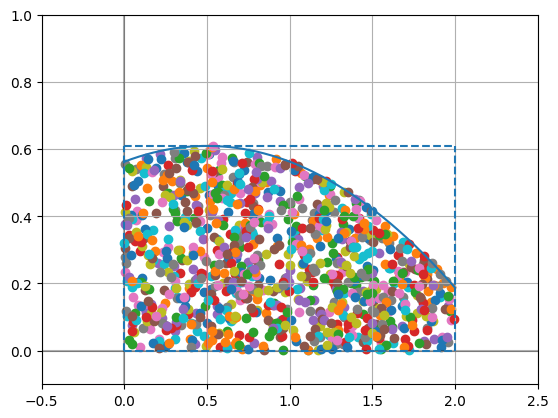

In [26]:
def generate_point():
    trial = 1
    while True:
        x = np.random.uniform(0, 2)
        y = np.random.uniform(0, fmax)
        if y <= f(x):
            return x, y, trial
        trial += 1


plt.plot(supp, f(supp))
plt.vlines(1/2, alpha=.3, color='r', ymin=0, ymax=fmax)
plt.axhline(0, alpha=.3, color='black')
plt.axvline(0, alpha=.3, color='black')
plt.hlines([0, fmax], xmin=0, xmax=2, ls='--')
plt.vlines([0, 2], ymin=0, ymax=fmax, ls='--')
plt.xlim(-.5, 2.5)
plt.ylim(-.1, 1)
plt.grid()

fmax = 3/16 * (3 + 1/2 - 1/2 ** 2)
size = 100000
num_trials = np.empty(size)
samples = np.empty(size)
ax = plt.gca()

for i in range(1000):
    x, y, trial = generate_point()
    num_trials[i] = trial
    samples[i] = x
    ax.scatter(x, y)

for i in range(size):
    x, y, trial = generate_point()
    num_trials[i] = trial
    samples[i] = x


In [27]:
print(f"E[X] = {samples.mean():.4f}, E[#(trials)]: {num_trials.mean():.4f}")


E[X] = 0.8748, E[#(trials)]: 1.2209


$$
\begin{aligned}
    E[X] &= \int_0^2 x f_X(x)dx \\
    &= \frac{3}{16}\int_0^2 3x + x^2 - x^3 dx \\ 
    &= \frac{3}{16}\left[ \frac{3}{2}x^2 + \frac{1}{3}x^3 - \frac{1}{4}x^4\right]^2_0 \\ 
    &= \frac{3}{16}\left[ 6 + \frac{8}{3} - 4\right] \\ 
    &= \frac{7}{8} = 0.875
\end{aligned}
$$